In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import logistic_regression as lr
from PIL import Image
from scipy import ndimage

/home/tarik/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


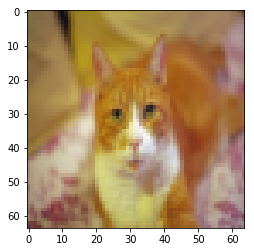

In [4]:
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [6]:
d = lr.model(train_set_x, train_set_y, test_set_x, test_set_y)
Y_prediction_test = lr.predict(d['w'], d['b'], test_set_x)
Y_prediction_train = lr.predict(d['w'], d['b'], train_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y)) * 100))

train accuracy: 96.65071770334929 %
test accuracy: 72.0 %
